In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv("Layoffs_cleaned.csv")
df.head()

,Company,Location HQ,Number_of_Layoff,Layoff_Date,Layoff_Percentage,Industry,Stage,Raised_Amount($mm),Country,Layoff_Month,Layoff_Year,Layoff_Quarter,Layoff_Severity,Funding_Category
0,Tract,London,100,2025-04-03,22.0,Real Estate,Unknown,180.0,United Kingdom,4,2025,2,Medium,Medium_funded
1,Automattic,SF Bay Area,281,2025-04-02,16.0,Other,Series E,986.0,United States,4,2025,2,Medium,high_funded
2,Canva,Sydney,10,2025-04-02,17.0,Consumer,Unknown,2500.0,Australia,4,2025,2,Low,high_funded
3,WhyHive,Melbourne,79,2025-04-02,100.0,Data,Seed,4.0,Australia,4,2025,2,Medium,low_funded
4,Northvolt,Stockholm,2800,2025-03-31,62.0,Energy,Unknown,13800.0,Sweden,3,2025,1,High,high_funded


In [ ]:
df.shape # Check for the dataframe size

(4024, 14)

In [ ]:
df.info() # check for the column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             4024 non-null   object 
 1   Location HQ         4021 non-null   object 
 2   Number_of_Layoff    4024 non-null   int64  
 3   Layoff_Date         4024 non-null   object 
 4   Layoff_Percentage   4024 non-null   float64
 5   Industry            4024 non-null   object 
 6   Stage               4024 non-null   object 
 7   Raised_Amount($mm)  4024 non-null   float64
 8   Country             4024 non-null   object 
 9   Layoff_Month        4024 non-null   int64  
 10  Layoff_Year         4024 non-null   int64  
 11  Layoff_Quarter      4024 non-null   int64  
 12  Layoff_Severity     4024 non-null   object 
 13  Funding_Category    4024 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 440.3+ KB


In [ ]:
# describe the related statistics for the every columns
df.describe(include='all')

,Company,Location HQ,Number_of_Layoff,Layoff_Date,Layoff_Percentage,Industry,Stage,Raised_Amount($mm),Country,Layoff_Month,Layoff_Year,Layoff_Quarter,Layoff_Severity,Funding_Category
count,4024,4021,4024.000000,4024,4024.000000,4024,4024,4024.000000,4024,4024.000000,4024.000000,4024.000000,4024,4024
unique,2777,250,NaN,1009,NaN,31,16,NaN,66,NaN,NaN,NaN,3,3
top,Amazon,SF Bay Area,NaN,2020-04-02,NaN,Finance,Post-IPO,NaN,United States,NaN,NaN,NaN,Medium,high_funded
freq,13,1000,NaN,27,NaN,488,886,NaN,2614,NaN,NaN,NaN,2830,1560
mean,NaN,NaN,206.846173,NaN,24.731859,NaN,NaN,749.973534,NaN,5.998757,2022.406809,2.356859,NaN,NaN
std,NaN,NaN,702.115937,NaN,24.658053,NaN,NaN,4351.970937,NaN,3.391110,1.294653,1.090208,NaN,NaN
min,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,1.000000,2020.000000,1.000000,NaN,NaN
25%,NaN,NaN,51.000000,NaN,12.000000,NaN,NaN,61.000000,NaN,3.000000,2022.000000,1.000000,NaN,NaN
50%,NaN,NaN,84.000000,NaN,17.500000,NaN,NaN,180.000000,NaN,6.000000,2023.000000,2.000000,NaN,NaN
75%,NaN,NaN,128.000000,NaN,23.000000,NaN,NaN,426.000000,NaN,9.000000,2023.000000,3.000000,NaN,NaN


Distribution Analysis

Text(0.5, 1.0, 'Distribution of Number of Layoffs')

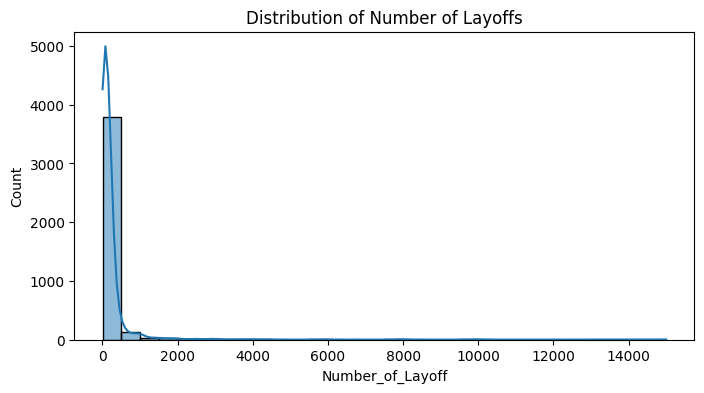

In [ ]:
# Number of Layoff
plt.figure(figsize=(8,4))
sns.histplot(df['Number_of_Layoff'], bins=30, kde=True)
plt.title('Distribution of Number of Layoffs')
# Count" means how many times a company laid off around X number of employees.

This visualization shows that :
1. Most companies have laid off fewer than 500 employees.
2. A very small number of companies had massive layoffs (up to 15,000).

3. The distribution is right-skewed, meaning most layoffs are small, but a few extreme events (big tech layoffs) stretch the tail.

It helps us to categorize companies into small/medium/large layoffs and useful to create categories like "Layoff Severity".



Text(0.5, 1.0, 'Distribution of Layoff Percentage')

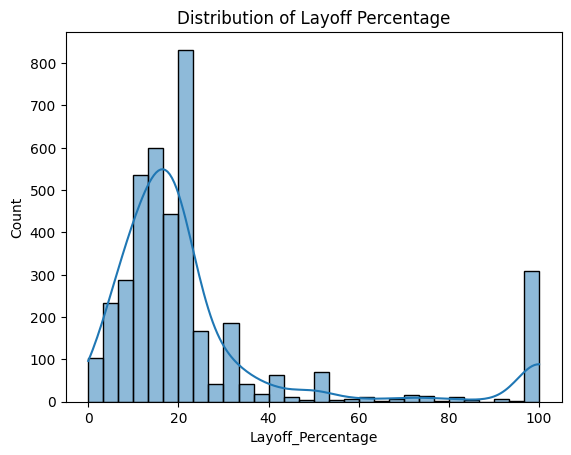

In [ ]:
# Layoff percentage
sns.histplot(df['Layoff_Percentage'], bins=30, kde=True)
plt.title('Distribution of Layoff Percentage')

This chart shows that:
1. Most layoffs were in the 10–30% range.
2. There's a small bump near 100%, meaning some companies completely shut down.
3. This Shows the severity of layoffs relative to company size.

Text(0.5, 1.0, 'Distribution of Funding Amount (Log Scale)')

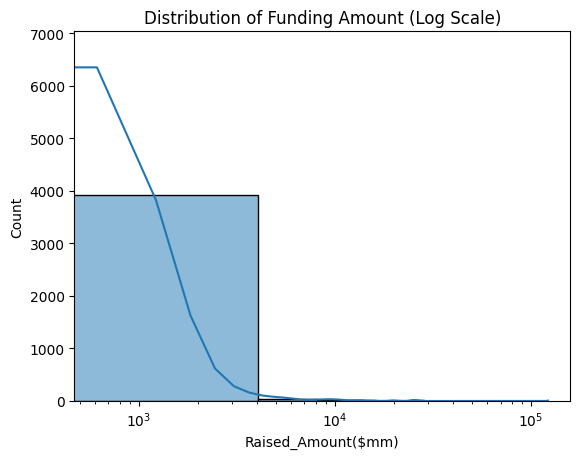

In [ ]:
# Raised Amount
# Log-scale histogram for better view
import numpy as np
# Apply log transformation first

sns.histplot(df['Raised_Amount($mm)'], bins=30, kde=True)
plt.xscale('log')
plt.title('Distribution of Funding Amount (Log Scale)')

This shows that:
1. Most companies raised less than $1000 million (or $1B).
2. Very few raised huge amounts — hence the use of log scale, which compresses wide ranges.
3. Based on observation, we can categorize companies as low-funded, medium-funded, high-funded.


Based on early observations of the *Number_of_Layoffs* and *Funding Amount*, I hypothesized that severity and funding categories might reveal key trends. I created engineered features (Layoff_Severity, Funding_Category) and validated their impact through the above graphs.

Univariate Visualizations (1 variable)

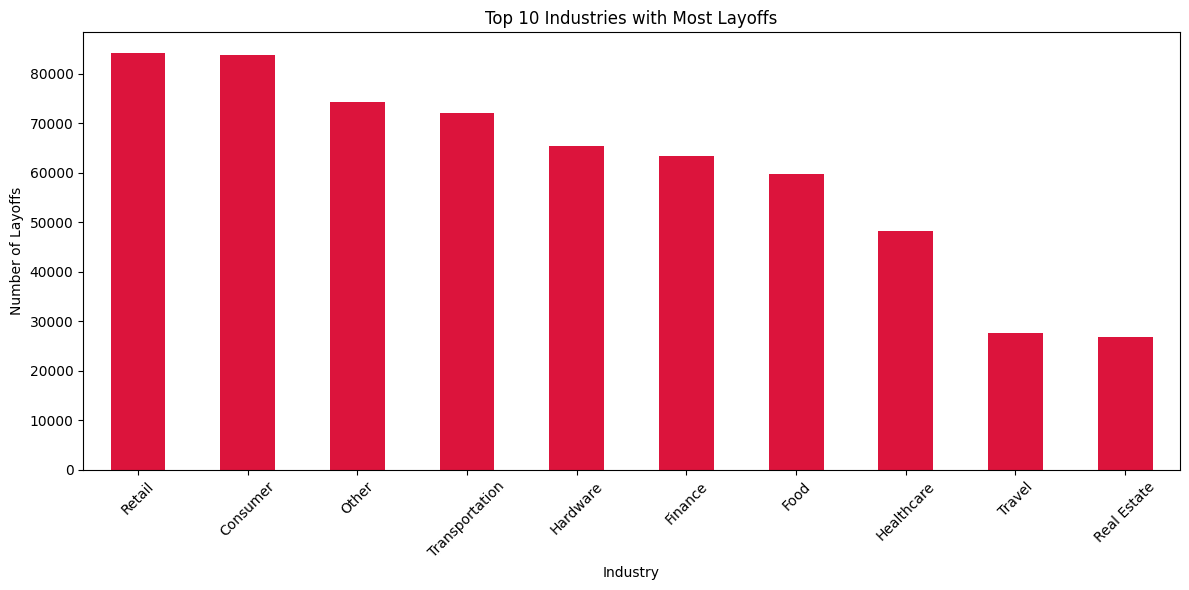

<Figure size 640x480 with 0 Axes>

In [ ]:
# Top industries by layoff
df.groupby('Industry')['Number_of_Layoff'].sum().sort_values(ascending= False).head(10).plot(kind='bar', figsize=(12,6), color='Crimson')
plt.title("Top 10 Industries with Most Layoffs")
plt.ylabel("Number of Layoffs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_Industries_layoffs.png")
plt.show()
plt.clf()

This visualization clearly shows that the Retail and Consumer are highest layoff industries. Other industries like Transportation, Hardware, Finance also has see a huge layoff.

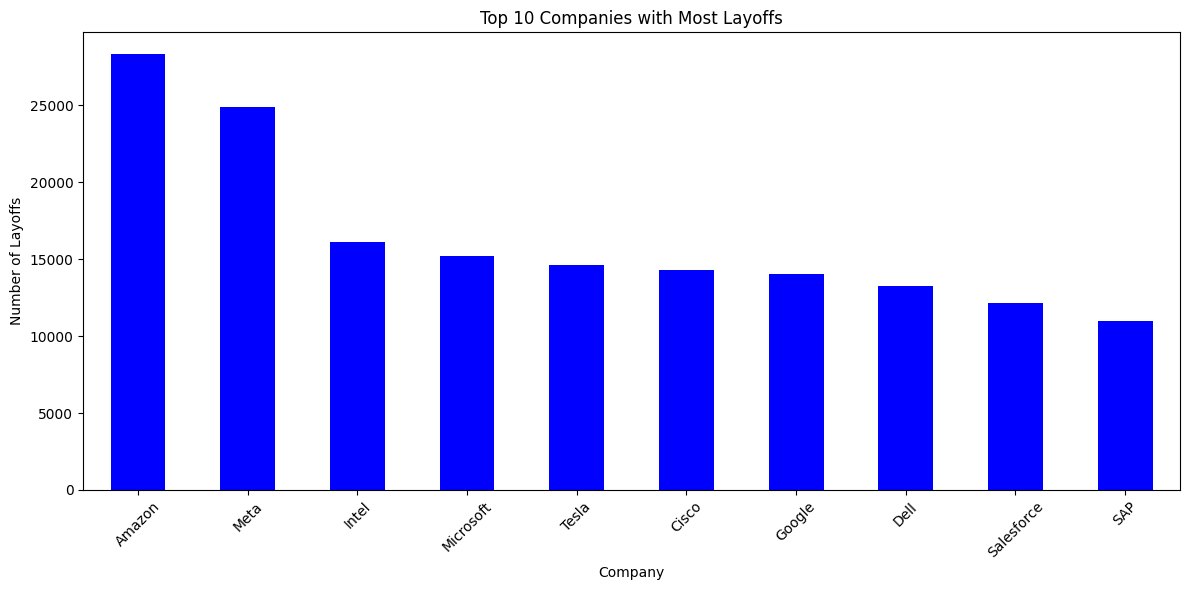

<Figure size 640x480 with 0 Axes>

In [ ]:
# Top compnies by layoff
df.groupby('Company')['Number_of_Layoff'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6), color='blue')
plt.title("Top 10 Companies with Most Layoffs")
plt.ylabel("Number of Layoffs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_companies_layoffs.png")
plt.show()
plt.clf()

This chart clearly shows that the Amazon has the highest layoff followed by the Meta, Intel, Microsoft and Tesla.

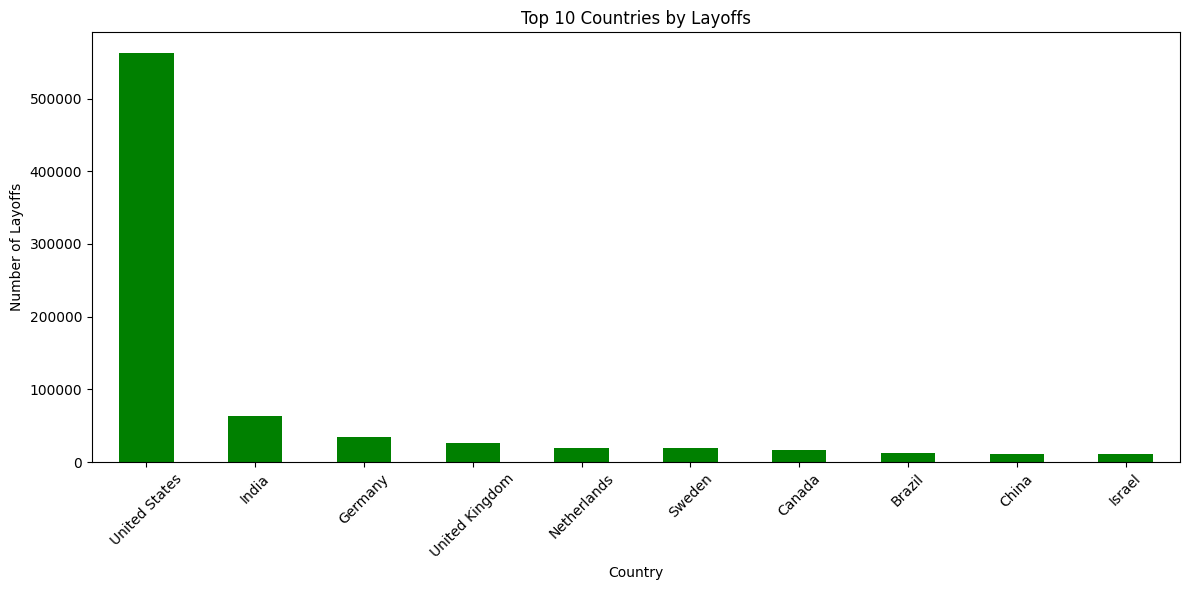

<Figure size 640x480 with 0 Axes>

In [ ]:
# Top 10 Countries by Layoff
df.groupby('Country')['Number_of_Layoff'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='green', figsize=(12,6))
plt.title("Top 10 Countries by Layoffs")
plt.ylabel("Number of Layoffs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("layoffs_by_country.png")
plt.show()
plt.clf()

This chart clearly shows that the USA has the highest number of layoff among all. After USA, India, Germany and the UK has the highest layoff.

Time Series Visualizations

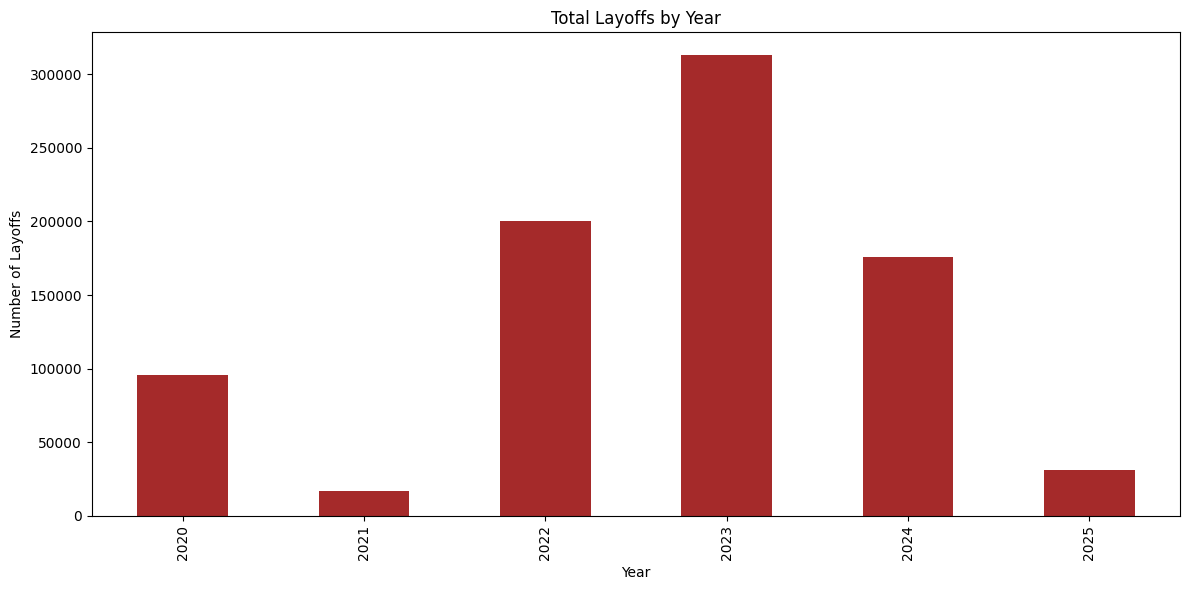

<Figure size 640x480 with 0 Axes>

In [ ]:
# Layoff by Year
df.groupby('Layoff_Year')['Number_of_Layoff'].sum().plot(kind='bar', color='brown', figsize=(12,6) )
plt.title("Total Layoffs by Year")
plt.xlabel("Year")
plt.ylabel("Number of Layoffs")
plt.tight_layout()
plt.savefig("layoffs_by_year.png")
plt.show()
plt.clf()

This graph shows that the Maximum layoff happens in the year 2023 followed by 2022 and 2024. Since year 2020, 2021 has least layoff till now.

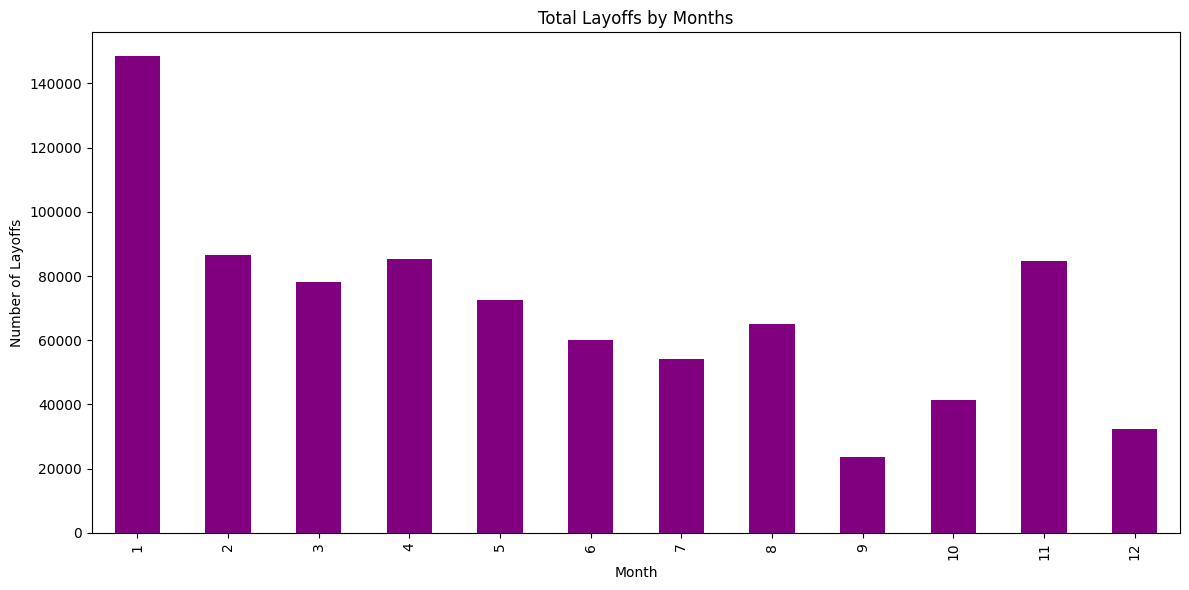

<Figure size 640x480 with 0 Axes>

In [ ]:
# Layoff by Months
df.groupby('Layoff_Month')['Number_of_Layoff'].sum().plot(kind='bar', color='purple', figsize=(12,6) )
plt.title("Total Layoffs by Months")
plt.xlabel("Month")
plt.ylabel("Number of Layoffs")
plt.tight_layout()
plt.savefig("layoffs_by_months.png")
plt.show()
plt.clf()

The chart shows that the January Month has highest layoff followed by November, April and Febuary.

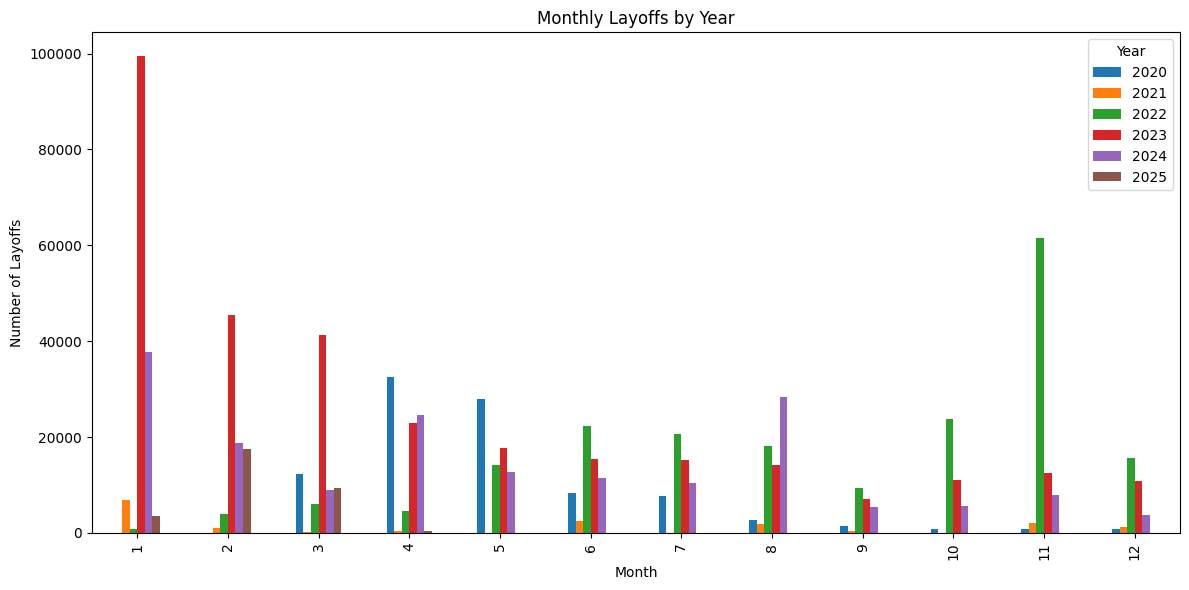

<Figure size 640x480 with 0 Axes>

In [ ]:
# Layoff by months over years
month_order = list(range(1, 13))
df.groupby(['Layoff_Year', 'Layoff_Month'])['Number_of_Layoff'].sum().unstack().T.plot(kind='bar', figsize=(12,6))
plt.title("Monthly Layoffs by Year")
plt.xlabel("Month")
plt.ylabel("Number of Layoffs")
plt.legend(title="Year")
plt.tight_layout()
plt.savefig("Monthly_Layoffs_by_year.png")
plt.show()
plt.clf()

This graph clearly shows the layoff in every
month in a year. Here it is clear that in the year 2023, January month has highest number of layoff followed by layoff in November 2022.

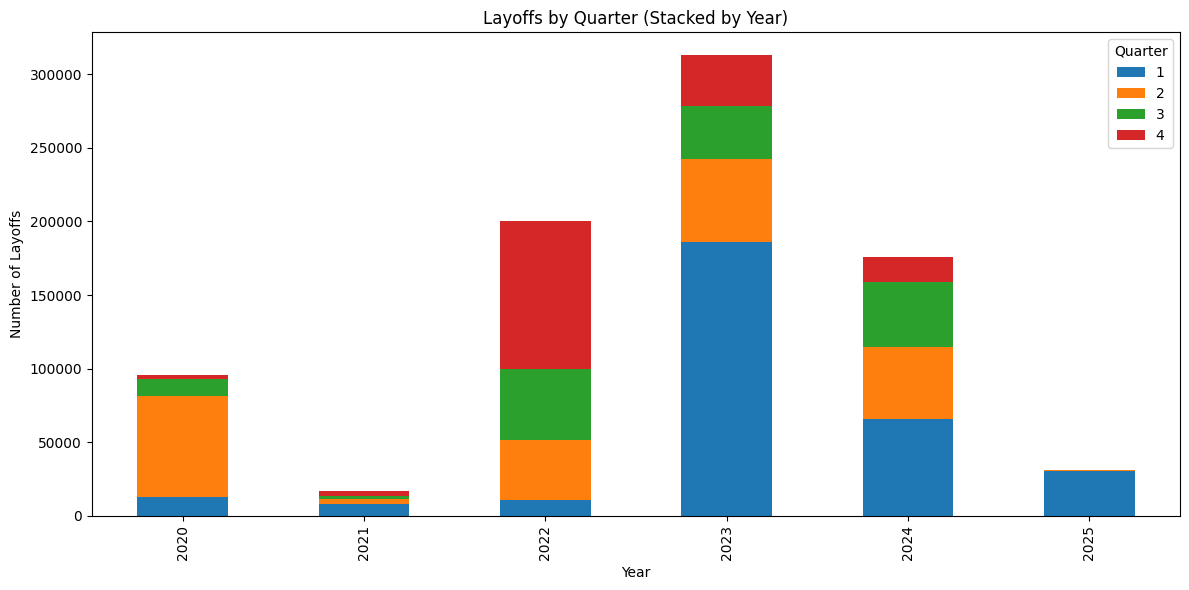

<Figure size 640x480 with 0 Axes>

In [ ]:
# Layoff by Quarter
df.groupby(['Layoff_Year', 'Layoff_Quarter'])['Number_of_Layoff'].sum().unstack().plot(kind='bar', figsize=(12,6),stacked=True)
plt.title("Layoffs by Quarter (Stacked by Year)")
plt.xlabel("Year")
plt.ylabel("Number of Layoffs")
plt.legend(title='Quarter')
plt.tight_layout()
plt.savefig("layoffs_by_quarter.png")
plt.show()
plt.clf()

This chart shows that layoffs don’t happen evenly throughout the year — they mostly happen in specific quarters, especially early in the year.
1. The highest layoff was in 2023 Q1, suggesting a major industry-wide downsizing during that time.
2. This graph shows that the Retail and consumer industry has highest layoff followed by other and transportation industry. Hardware, Finance and Food industry also highly affected by layoffs.
3. This chart clearly shows that from year 2020 to till now, Amazon has highest layoff followed by Meta, Intel and Microsoft.
4. This graph clearly shows that the United State has highest layoff followed by India and Germany. US has highest number of layoff among all.

**Bivariate Visualizations (2 variables)**

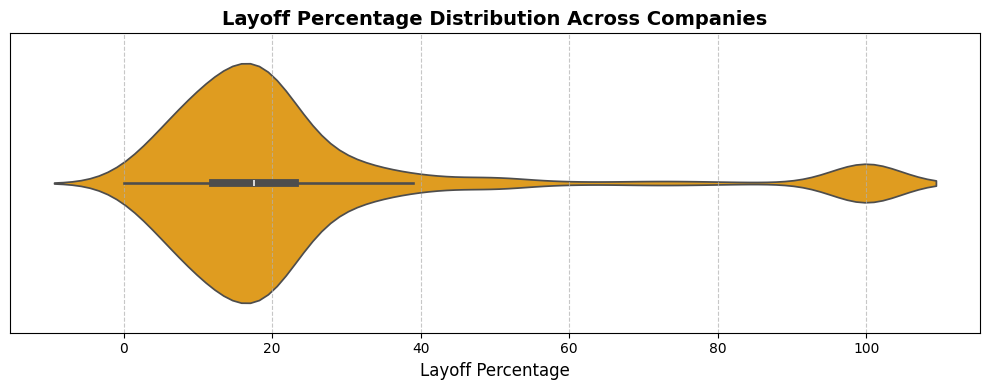

<Figure size 640x480 with 0 Axes>

In [ ]:
# Layoff percentage distribution across compnies
plt.figure(figsize=(10, 4))
sns.violinplot(x=df['Layoff_Percentage'].dropna(), color='orange')
plt.title("Layoff Percentage Distribution Across Companies", fontsize=14, fontweight='bold')
plt.xlabel("Layoff Percentage", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks([])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("layoff_percentage_distribution_across_compnies.png")
plt.show()
plt.clf()

This violin plot visualizes the distribution of layoff percentages across companies in the dataset.  
*   Wider parts = more companies with layoffs around that percentage.
*   Narrower parts = fewer companies with layoffs around that percentage.

1. **Thickest Area ~15–25%**: This means a large number of companies laid off between 15% and 25% of their workforce.
That’s where the distribution peaks the most common layoff range.

2. **Narrow areas ~60–80%**: Few companies laid off that much.It’s uncommon in the dataset.

3. **Small bump at 100%**: A small but noticeable number of companies laid off 100% (probably shut down).
That part is narrow but not invisible — so it’s not very frequent, but still significant.

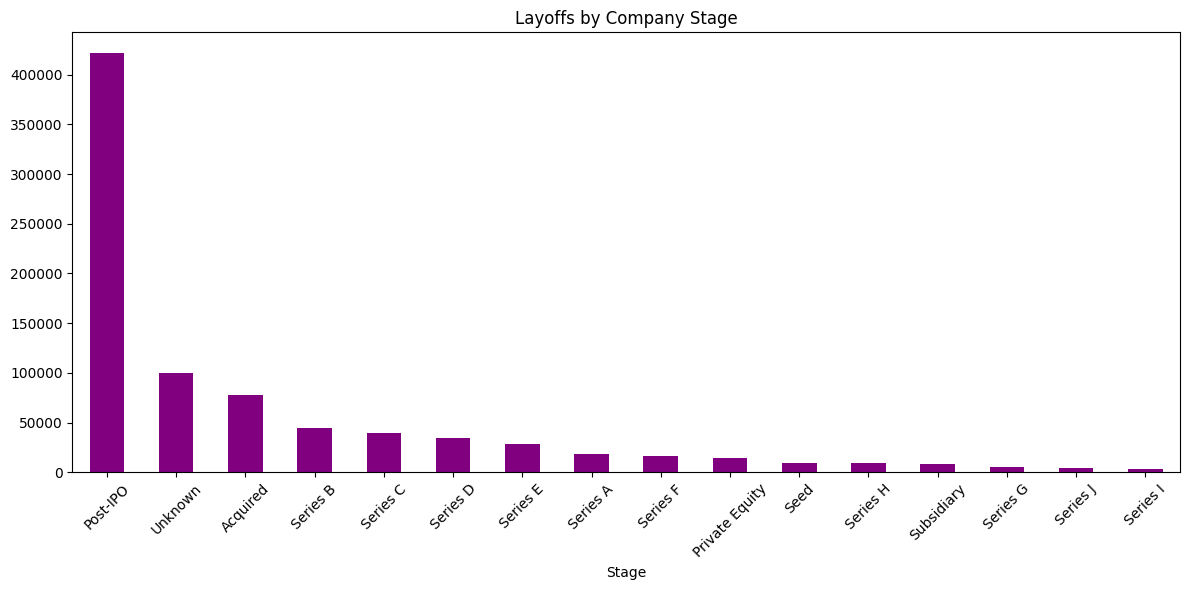

<Figure size 640x480 with 0 Axes>

In [ ]:
# Layoff by Funding stage
df.groupby('Stage')['Number_of_Layoff'].sum().sort_values(ascending=False).plot(kind='bar', color='purple', figsize=(12,6))
plt.title("Layoffs by Company Stage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("layoffs_by_funding_stage.png")
plt.show()
plt.clf()

This chart clearly shows that the compnies after the IPO are most to layoff. After that the Acquired and some unknown stage compnies more to layoff.

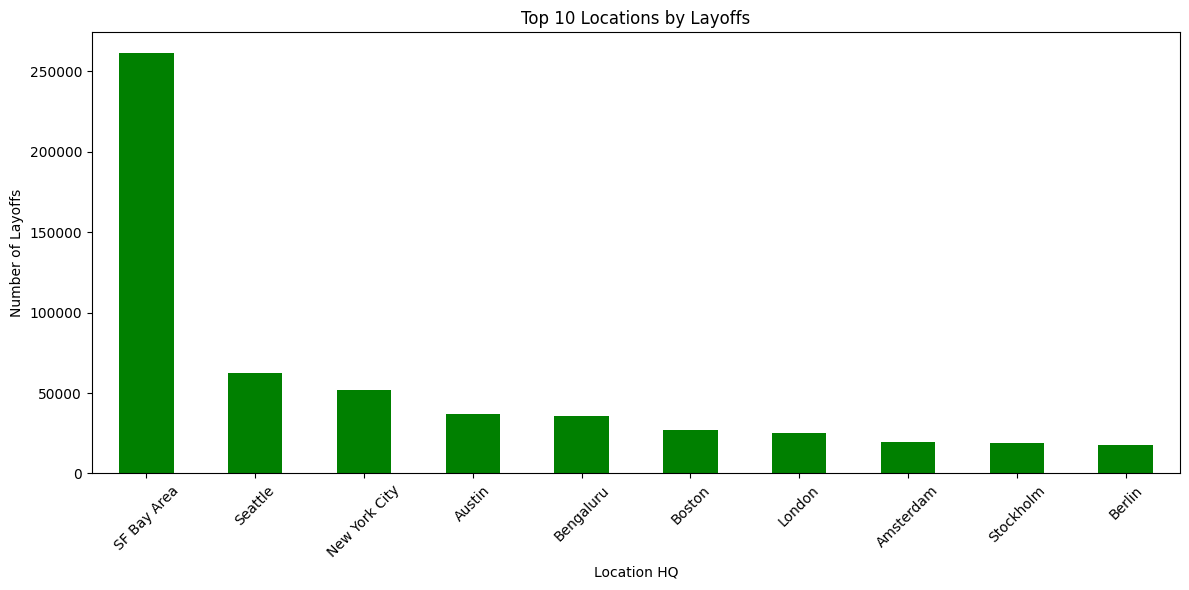

<Figure size 640x480 with 0 Axes>

In [ ]:
# Layoff by Locations
df.groupby('Location HQ')['Number_of_Layoff'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='green', figsize=(12,6))
plt.title("Top 10 Locations by Layoffs")
plt.ylabel("Number of Layoffs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("layoffs_by_Locations.png")
plt.show()
plt.clf()

This chart clearly shows that the SF Bay Area is the most affected location by layoff followed by Seattle and New York City.

<ipython-input-172-9277cde604a5>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Funding_Bin')['Number_of_Layoff'].sum().reset_index()


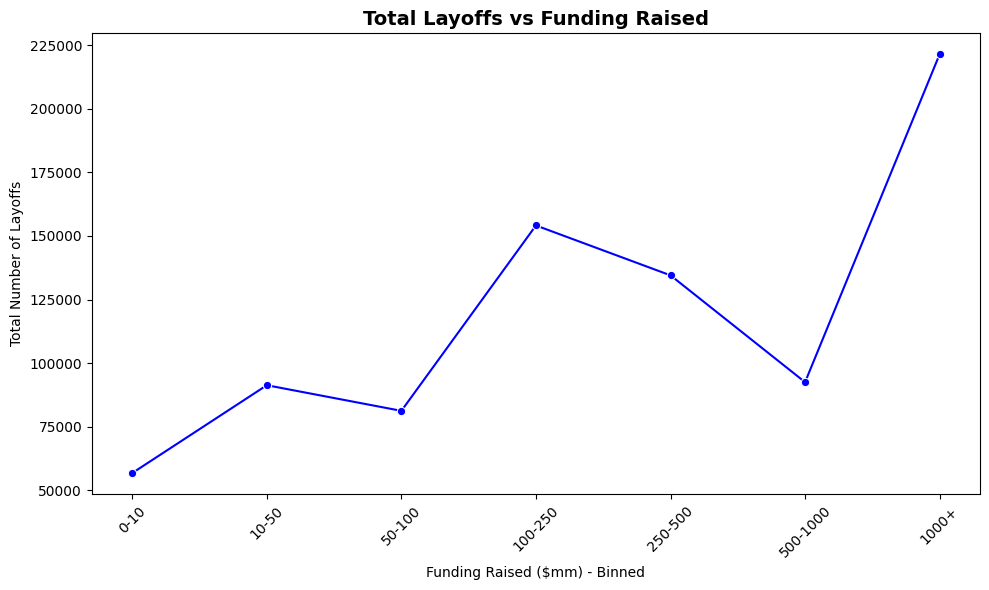

<Figure size 640x480 with 0 Axes>

In [ ]:
# Layoffs by the Raised Amounts
df['Funding_Bin'] = pd.cut(df['Raised_Amount($mm)'],
                           bins=[0, 10, 50, 100, 250, 500, 1000, df['Raised_Amount($mm)'].max()],
                           labels=["0-10", "10-50", "50-100", "100-250", "250-500", "500-1000", "1000+"])

# Group by funding bins and sum layoffs
grouped = df.groupby('Funding_Bin')['Number_of_Layoff'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Funding_Bin', y='Number_of_Layoff', marker='o', color='blue')
plt.title("Total Layoffs vs Funding Raised", fontsize=14, fontweight='bold')
plt.xlabel("Funding Raised ($mm) - Binned")
plt.ylabel("Total Number of Layoffs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Total_Layoffs_by_Funding_Raised.png")
plt.show()
plt.clf()

In [ ]:
del df['Funding_Bin']

This chart shows that the highest raised compnies has most number of layoff but they are not following a linear trends.

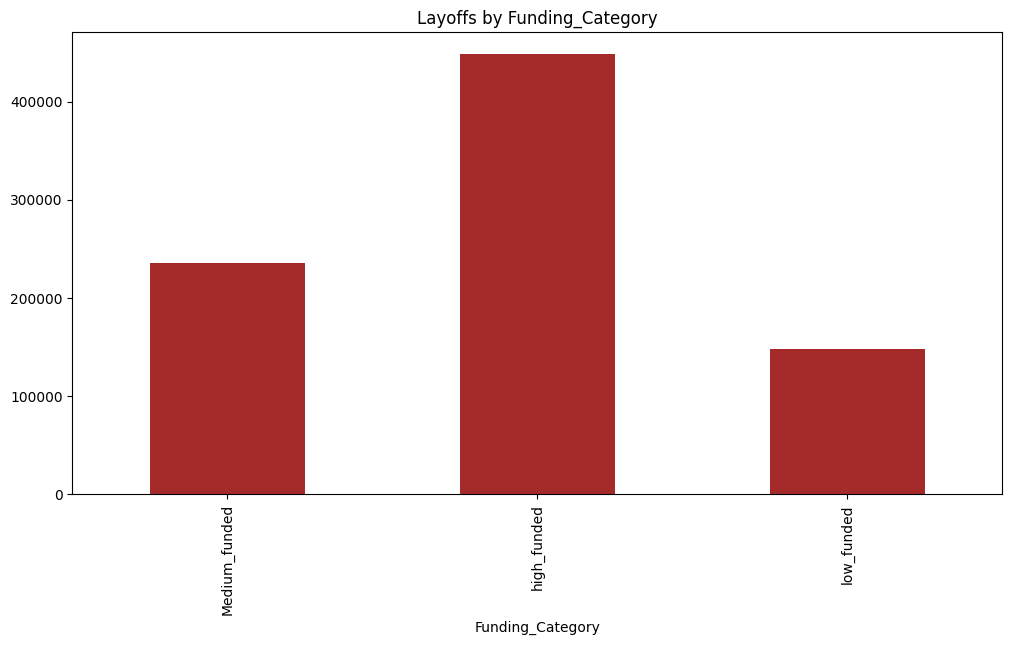

<Figure size 640x480 with 0 Axes>

In [ ]:
# Layoff Severity by the total Layoff
df.groupby('Funding_Category')['Number_of_Layoff'].sum().plot(kind='bar', color='brown', figsize=(12,6))
plt.title("Layoffs by Funding_Category")
plt.savefig("Layoff_by_Funding_Category.png")
plt.show()
plt.clf()

This visualization shows that the high funded compnies has most layoffs.

In [ ]:
df.head()

,Company,Location HQ,Number_of_Layoff,Layoff_Date,Layoff_Percentage,Industry,Stage,Raised_Amount($mm),Country,Layoff_Month,Layoff_Year,Layoff_Quarter,Layoff_Severity,Funding_Category
0,Tract,London,100,2025-04-03,22.0,Real Estate,Unknown,180.0,United Kingdom,4,2025,2,Medium,Medium_funded
1,Automattic,SF Bay Area,281,2025-04-02,16.0,Other,Series E,986.0,United States,4,2025,2,Medium,high_funded
2,Canva,Sydney,10,2025-04-02,17.0,Consumer,Unknown,2500.0,Australia,4,2025,2,Low,high_funded
3,WhyHive,Melbourne,79,2025-04-02,100.0,Data,Seed,4.0,Australia,4,2025,2,Medium,low_funded
4,Northvolt,Stockholm,2800,2025-03-31,62.0,Energy,Unknown,13800.0,Sweden,3,2025,1,High,high_funded


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             4024 non-null   object 
 1   Location HQ         4021 non-null   object 
 2   Number_of_Layoff    4024 non-null   int64  
 3   Layoff_Date         4024 non-null   object 
 4   Layoff_Percentage   4024 non-null   float64
 5   Industry            4024 non-null   object 
 6   Stage               4024 non-null   object 
 7   Raised_Amount($mm)  4024 non-null   float64
 8   Country             4024 non-null   object 
 9   Layoff_Month        4024 non-null   int64  
 10  Layoff_Year         4024 non-null   int64  
 11  Layoff_Quarter      4024 non-null   int64  
 12  Layoff_Severity     4024 non-null   object 
 13  Funding_Category    4024 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 440.3+ KB
